<a href="https://colab.research.google.com/github/shravanimmy/stock-project-group/blob/main/stock_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - COVID-19 and its effect on the stock market

You have been tasked with creating some visualisations and reporting on the effect of COVID-19 on the stock market.  You will use all the concepts and skills you have learned so far in this course.  You may have a group of up to 3 participants to produce the solution to the final project.



**Step 1**)	Set up a Git repository to allow you to collaborate on the Python solution.

https://github.com/shravanimmy/stock-project-group.git

**Step 2**)	Read the daily confirmed cases and deaths into two dataframes can be found at this github page:

  a)	confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

  b)	deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"


**Step 3**)	Use pandas to create a dataframe that aggregates and sums both confirmed cases and deaths on a global level


In [42]:
import pandas as pd

# URLs for confirmed cases and deaths
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

# Read data into dataframes
confirmed_cases_df = pd.read_csv(confirmed_cases_url)

deaths_df = pd.read_csv(deaths_url)

# Drop unnecessary columns (Latitude, Longitude, etc.)
confirmed_cases_df = confirmed_cases_df.drop(columns=['Lat', 'Long', 'Province/State'])
deaths_df = deaths_df.drop(columns=['Lat', 'Long', 'Province/State'])

# Aggregate and sum on a global level
global_confirmed_cases = confirmed_cases_df.sum(axis=0)[3:]  # Starting from the 4th column (dates)
global_deaths = deaths_df.sum(axis=0)[3:]  # Starting from the 4th column (dates)

# Calculate per day data by subtracting each day with the previous day
daily_confirmed = global_confirmed_cases.diff().fillna(global_confirmed_cases.iloc[0])
daily_deaths = global_deaths.diff().fillna(global_deaths.iloc[0])



# Create a new dataframe
global_data = pd.DataFrame({
    'Date': global_confirmed_cases.index,
    'Global_Confirmed_Cases': daily_confirmed.values,
    'Global_Deaths': daily_deaths.values
})

# Display the resulting dataframe
#print(global_data)
global_data


,Date,Global_Confirmed_Cases,Global_Deaths
0,1/24/20,944,26
1,1/25/20,493,16
2,1/26/20,683,14
3,1/27/20,809,26
4,1/28/20,2651,49
...,...,...,...
1136,3/5/23,56126,148
1137,3/6/23,58040,366
1138,3/7/23,130437,923
1139,3/8/23,179446,1445


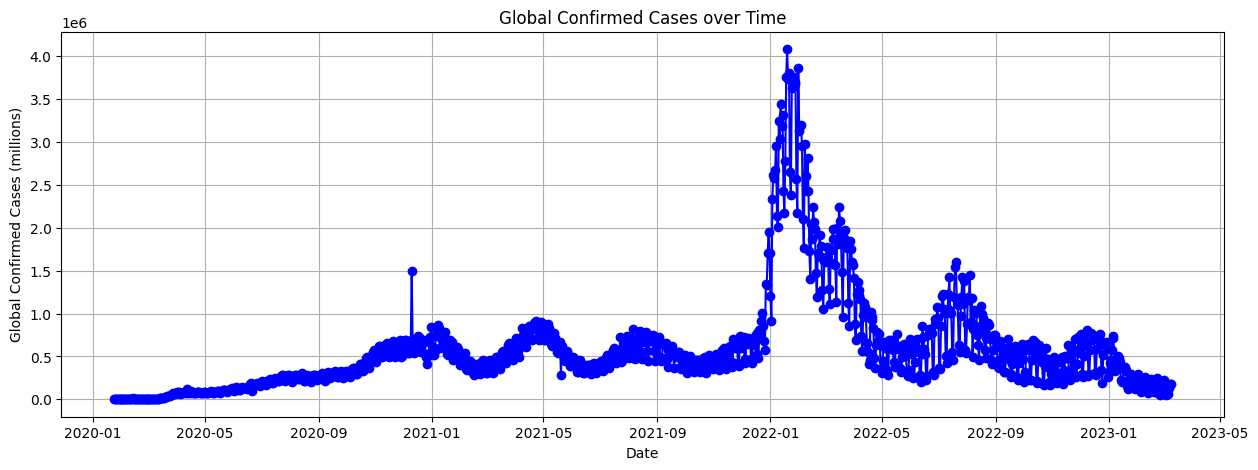

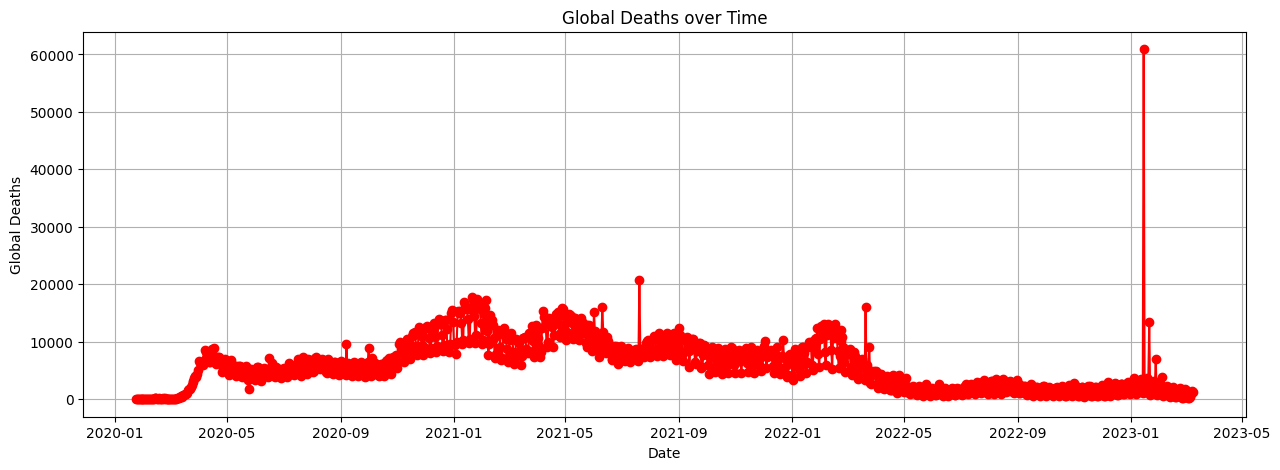

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' to datetime format
global_data['Date'] = pd.to_datetime(global_data['Date'])

# Plot 1: Global Confirmed Cases over Time
plt.figure(figsize=(15, 5))
plt.plot(global_data['Date'], global_data['Global_Confirmed_Cases'], marker='o', linestyle='-', color='b')
plt.title('Global Confirmed Cases over Time')
plt.xlabel('Date')
plt.ylabel('Global Confirmed Cases (millions)')
plt.grid(True)
plt.show()

# Plot 2: Global Deaths over Time
plt.figure(figsize=(15, 5))
plt.plot(global_data['Date'], global_data['Global_Deaths'], marker='o', linestyle='-', color='r')
plt.title('Global Deaths over Time')
plt.xlabel('Date')
plt.ylabel('Global Deaths')
plt.grid(True)
plt.show()


*Graph 1:* Global Confirmed Cases over Time
X-Axis (Horizontal): Represents the timeline in dates
Y-Axis (Vertical): Represents the number of global confirmed cases.
Blue Line: Connects data points, showing the trend of global confirmed cases over time.
Blue Markers (o): Indicate individual data points on the line.

*Graph 2:* Global Deaths over Time
X-Axis (Horizontal): Represents the timeline in dates
Y-Axis (Vertical): Represents the number of global deaths.
Red Line: Connects data points, showing the trend of global deaths over time.
Red Markers (o): Indicate individual data points on the line.

# **General Interpretation:**
By examining the slope and pattern of the lines, one can observe the rate of increase in confirmed cases and deaths over time.
The initial trend reveals a steady increase in COVID-19 cases, maintaining a consistent rate until a sudden dip to 1.5 million at the close of 2020. Subsequently, a sinusoidal pattern characterized the entirety of 2021. Beginning in 2022, confirmed cases experienced a notable ascent, with the peak occurring between January and May, surpassing 4 million cases. Post-May 2022, the number of confirmed cases stabilized, fluctuating within a range of 0.25 million to 1.5 million.

Between 2020 and December 2022, the number of COVID-19 death cases remained consistently below 20,000, signifying a relatively stable period. From May 2022 until the year's conclusion, the daily reported COVID-19 cases never exceeded 5,000. However, a significant shift occurred in January 2023 when the number of COVID-19 death cases surged to 60,903, reaching the highest count observed in recent years.

In [44]:
global_data.to_csv("Coviddata.csv")

**Step 4**)	Research a stock for each below that reflects the following industries (it will be used in the next step):

  a)	Overall American Market

  b)	Overall Canadian Market

  c)	Travel sector

  d)	The Real Estate sector

  e)	Precious metals (Gold, Silver, Platinum, etc)


**Step 5**)	Use AlphaVantage (the stock API used earlier in the course) or another website to get the daily high and low prices for your selected stocks

**Step 7**)	Create an appropriate graph detailing your info - explain why you chose the graphs you did, use matplotlib


In [45]:
pip install alpha_vantage

**1. Overall American Market >>Tesla Inc. (TSLA)**

Tesla, Inc. is an American multinational automotive and clean energy company headquartered in Austin, Texas, which designs and manufactures electric vehicles, stationary battery energy storage devices from home to grid-scale, solar panels and solar shingles, and related products and services.


In [46]:
from os import close
####For Tesla - American Market
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import time


api_key = 'QPNJZSFZ1S2LPWEJ'
# Create an instance of the TimeSeries class

#american market
ts = TimeSeries(key=api_key, output_format='pandas')
data=ts.get_daily(symbol='TSLA', outputsize='full')

for date in global_data['Date']:
  d=data[0][(data[0].index == date)]
  if(d.empty):
      high_price=0
      low_price =0
      close_price = 0
  else:
        high_price=d['2. high'][0]
        low_price=d['3. low'][0]
        close_price=d['4. close'][0]

  global_data.loc[global_data['Date'] == date, 'TSLA_High'] = high_price
  global_data.loc[global_data['Date'] == date, 'TSLA_Low'] = low_price
  global_data.loc[global_data['Date'] == date, 'TSLA_Close'] = close_price


global_data[['Date', 'TSLA_High', 'TSLA_Low','TSLA_Close']]


,Date,TSLA_High,TSLA_Low,TSLA_Close
0,2020-01-24,573.86,554.2600,564.82
1,2020-01-25,0.00,0.0000,0.00
2,2020-01-26,0.00,0.0000,0.00
3,2020-01-27,564.44,539.2800,558.02
4,2020-01-28,576.81,558.0800,566.90
...,...,...,...,...
1136,2023-03-05,0.00,0.0000,0.00
1137,2023-03-06,198.60,192.3000,193.81
1138,2023-03-07,194.20,186.1000,187.71
1139,2023-03-08,186.50,180.0000,182.00


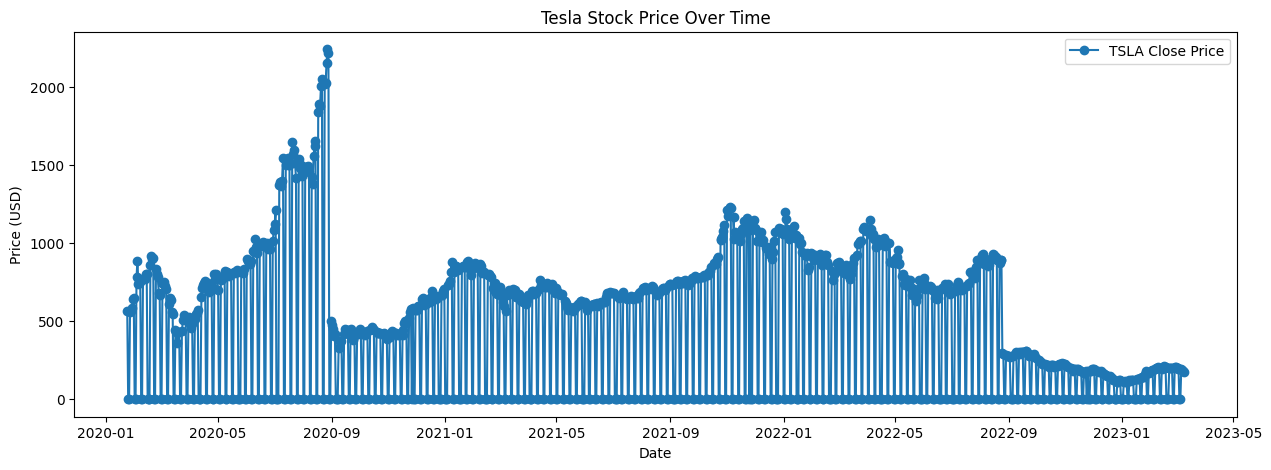

In [47]:
# Plot 1: Tesla Stock Price Over Dates
# Convert 'Date' to datetime format
global_data['Date'] = pd.to_datetime(global_data['Date'])

plt.figure(figsize=(15, 5))
plt.plot(global_data['Date'], global_data['TSLA_Close'], label='TSLA Close Price', marker='o')
plt.title('Tesla Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

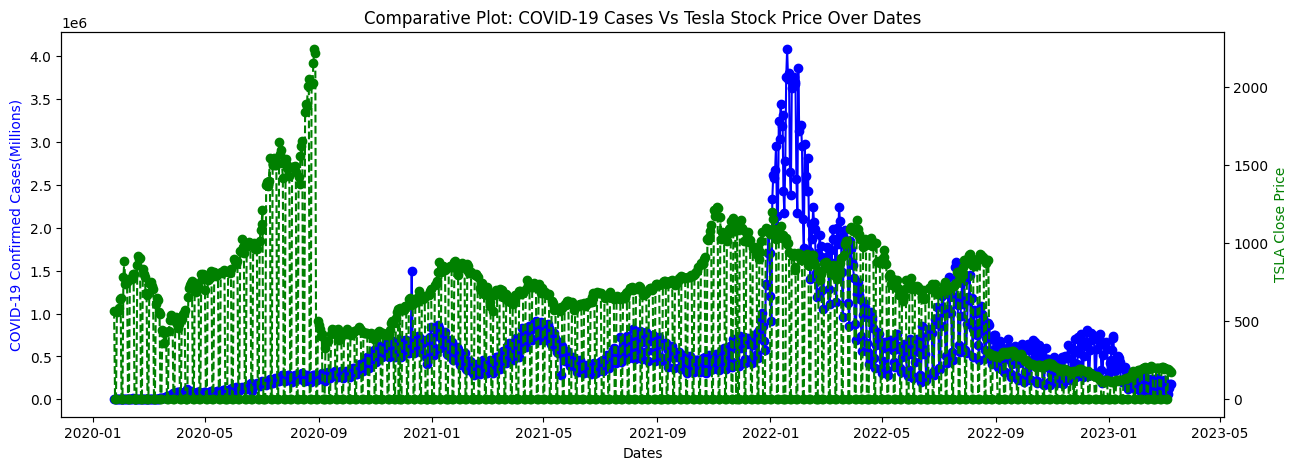

In [48]:

#Plot 2 :Comparative Plot: COVID-19 Cases and Tesla Stock Price Over Time
# Create a Comparative Plot
plt.figure(figsize=(15, 5))
# Plot COVID-19 Cases
plt.plot(global_data['Date'], global_data['Global_Confirmed_Cases'], label='Confirmed Cases', marker='o', color='blue')
# Plot COVID-19 Deaths on a secondary y-axis
ax1 = plt.gca()
#ax2 = ax1.twinx()
#ax2.plot(global_data['Date'], global_data['Global_Deaths'], label='Deaths', marker='o', color='red')

# Plot Tesla Stock Price on a secondary y-axis
ax3 = ax1.twinx()
ax3.plot(global_data['Date'], global_data['TSLA_Close'], label='TSLA Close Price', marker='o', linestyle='dashed', color='green')

# Customize the plot
ax1.set_xlabel('Dates')
ax1.set_ylabel('COVID-19 Confirmed Cases(Millions)', color='blue')
#ax2.set_ylabel('COVID-19 Deaths', color='red')
ax3.set_ylabel('TSLA Close Price', color='green')

plt.title('Comparative Plot: COVID-19 Cases Vs Tesla Stock Price Over Dates')
plt.show()

*Plot 1: Tesla Stock Price Over Time*

*Plot 2: Comparative Plot - COVID-19 Cases, Deaths, and Tesla Stock*
The blue line with circular markers represents the trend of global confirmed COVID-19 cases.The green dashed line with circular markers represents the trend of Tesla stock closing prices. It is plotted on a secondary y-axis to the right.Represents the timeline in dates.

This comparative plot allows visually inspect potential correlations or patterns between COVID-19 confirmed cases data and Tesla stock prices over the given time period. The secondary y-axes help in comparing values with different scales.

# **General Interpretation:**
In the early stages of the COVID-19 pandemic, the relatively low rate of increase in cases, initially ranging from 500 to 2800, did not significantly impact the stock price. However, after September 2020, a rapid surge in COVID-19 cases resulted in a consequential dip in the stock value, plummeting from 2800 to 500. Subsequently, from then until January 2022, the stock price maintained a steady range, fluctuating within 1000, demonstrating resilience despite fluctuations in the pandemic landscape.

Between January and May 2022, despite a sudden increase in COVID-19 cases, the stock price remained unaffected, adhering to its established trend. Post-September 2022, as COVID-19 cases began to decrease, an unexpected parallel decline in the stock price ensued. This interprets that while the initial stages of the pandemic notably impacted Tesla's stock market, subsequent fluctuations in stock prices were not exclusively dependent on COVID-19 confirmed cases.







**2. Canada Market>>Toronto-Dominion Bank**

Toronto-Dominion Bank, doing business as TD Bank Group, is a Canadian multinational banking and financial services corporation headquartered in Toronto, Ontario.

In [49]:
###For TD - Canada Market
# Alpha Vantage API key (replace 'your_api_key' with your actual API key)
# api_key = '44R0OA310NHJ03W8'
# api_key = '4GCMU5950MOXB55I'
# api_key = 'QPNJZSFZ1S2LPWEJ'
# api_key = '45TFGXRKLDVI8I1T'

api_key = 'QPNJZSFZ1S2LPWEJ'
# Create an instance of the TimeSeries class

#american market
ts = TimeSeries(key=api_key, output_format='pandas')
data=ts.get_daily(symbol='TD', outputsize='full')
#x=ts.get_daily()
for date in global_data['Date']:

  d=data[0][(data[0].index == date)]
  if(d.empty):
      high_price=0
      low_price =0
      close_price=0
  else:
        high_price=d['2. high'][0]
        low_price=d['3. low'][0]
        close_price=d['4. close'][0]

  global_data.loc[global_data['Date'] == date, 'TD_High'] = high_price
  global_data.loc[global_data['Date'] == date, 'TD_Low'] = low_price
  global_data.loc[global_data['Date'] == date, 'TD_Close'] = close_price


global_data[[ 'TD_High', 'TD_Low','TD_Close']]

,TD_High,TD_Low,TD_Close
0,56.740,56.240,56.46
1,0.000,0.000,0.00
2,0.000,0.000,0.00
3,56.180,55.510,56.08
4,56.400,55.990,56.39
...,...,...,...
1136,0.000,0.000,0.00
1137,65.905,65.140,65.20
1138,64.970,63.070,63.46
1139,63.590,62.835,63.17


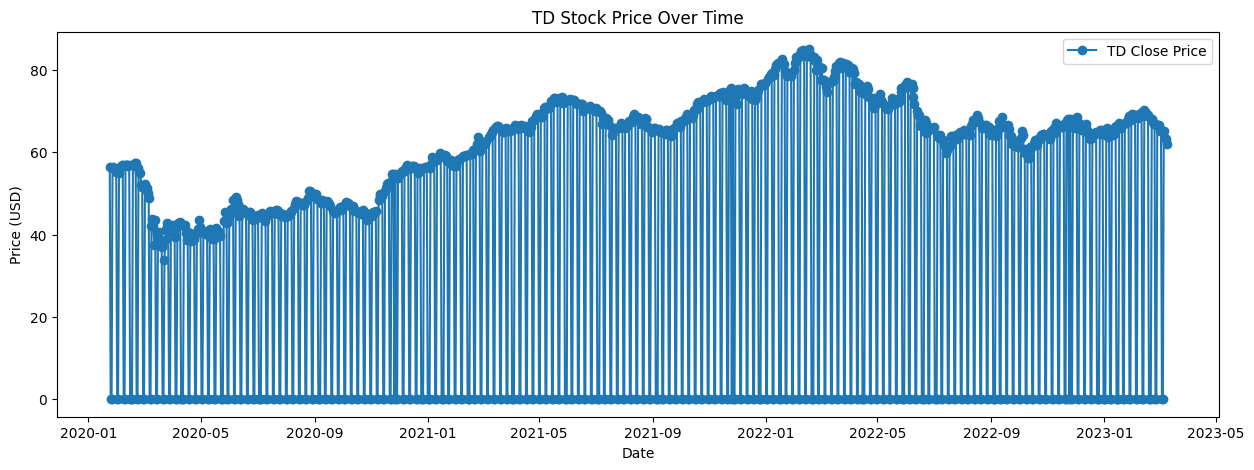

In [50]:
# Plot 1: TD Stock Price Over Time

# Convert 'Date' to datetime format
global_data['Date'] = pd.to_datetime(global_data['Date'])

plt.figure(figsize=(15, 5))
plt.plot(global_data['Date'], global_data['TD_Close'], label='TD Close Price', marker='o')
plt.title('TD Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

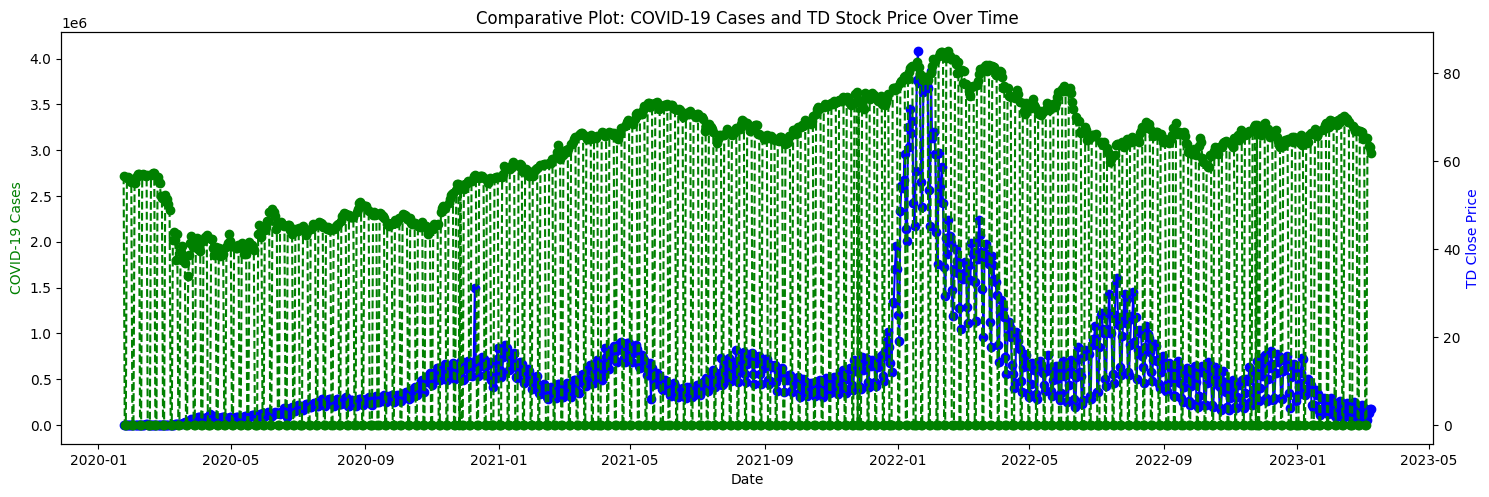

In [51]:
#Plot 2 :Comparative Plot: COVID-19 Cases, and TD Stock Price Over Time
# Create a Comparative Plot
plt.figure(figsize=(15, 5))
# Plot COVID-19 Cases
plt.plot(global_data['Date'], global_data['Global_Confirmed_Cases'], label='Confirmed Cases', marker='o', color='blue')
# Plot COVID-19 Deaths on a secondary y-axis
ax1 = plt.gca()
# ax2 = ax1.twinx()
# ax2.plot(global_data['Date'], global_data['Global_Deaths'], label='Deaths', marker='o', color='red')

# Plot TD Stock Price on a secondary y-axis
ax3 = ax1.twinx()
ax3.plot(global_data['Date'], global_data['TD_Close'], label='TD Close Price', marker='o', linestyle='dashed', color='green')

# Customize the plot
ax1.set_xlabel('Date')
ax1.set_ylabel('COVID-19 Cases', color='green')
ax3.set_ylabel('TD Close Price', color='blue')
# Set locator and formatter for the x-axis (dates)

# Rotate x-axis labels for better readability
plt.xticks(rotation=95)

plt.tight_layout()  # Adjust layout to prevent overlap

plt.title('Comparative Plot: COVID-19 Cases and TD Stock Price Over Time')
plt.show()

Plot 1: TD Stock Price Over Time

Plot 2: Comparative Plot - COVID-19 Cases and Tesla Stock The green line with circular markers represents the trend of global confirmed COVID-19 cases.The blue dashed line with circular markers represents the trend of TD stock closing prices. It is plotted on a secondary y-axis to the right.Represents the timeline in dates.

# General Interpertation

During the initial phase of the COVID-19 pandemic, the rate of case increase, which initially ranged from 500 to 2800, had a limited impact on the stock price. However, a noticeable trend emerges from May 2020 onwards, where both the stock price and the number of COVID-19 cases exhibited an upward trajectory. This ascent culminated in the stock price reaching its peak by March 2021.

Unexpectedly, despite a substantial decline in the stock price thereafter, the number of COVID-19 cases remained relatively steady with no significant fluctuations.

**3. Travel sector>>Expedia Group**

Expedia Group, Inc. is an American travel technology company that owns and operates travel fare aggregators and travel metasearch engines, including Expedia.com, Hotels.com, Vrbo, Travelocity, Hotwire.com, Orbitz, Ebookers, CheapTickets, CarRentals.com, Expedia Cruises, Wotif, and Trivago.

In [52]:
###For Expedia - Travel sector
# Alpha Vantage API key (replace 'your_api_key' with your actual API key)
# api_key = '44R0OA310NHJ03W8'
# api_key = '4GCMU5950MOXB55I'
# api_key = 'QPNJZSFZ1S2LPWEJ'
# api_key = '45TFGXRKLDVI8I1T'

api_key = 'QPNJZSFZ1S2LPWEJ'
# Create an instance of the TimeSeries class

#american market
ts = TimeSeries(key=api_key, output_format='pandas')
data=ts.get_daily(symbol='ExPE', outputsize='full')
for date in global_data['Date']:

  d=data[0][(data[0].index == date)]
  if(d.empty):
      high_price=0
      low_price =0
      close_price =0
  else:
        high_price=d['2. high'][0]
        low_price=d['3. low'][0]
        close_price=d['4. close'][0]

  global_data.loc[global_data['Date'] == date, 'EXPE_High'] = high_price
  global_data.loc[global_data['Date'] == date, 'EXPE_Low'] = low_price
  global_data.loc[global_data['Date'] == date, 'EXPE_Close'] = close_price


global_data[[ 'EXPE_High', 'EXPE_Low', 'EXPE_Close']]

,EXPE_High,EXPE_Low,EXPE_Close
0,114.280,111.731,112.14
1,0.000,0.000,0.00
2,0.000,0.000,0.00
3,109.885,106.890,109.08
4,110.400,109.000,109.11
...,...,...,...
1136,0.000,0.000,0.00
1137,110.090,107.560,108.55
1138,110.640,107.150,107.51
1139,108.630,106.030,107.23


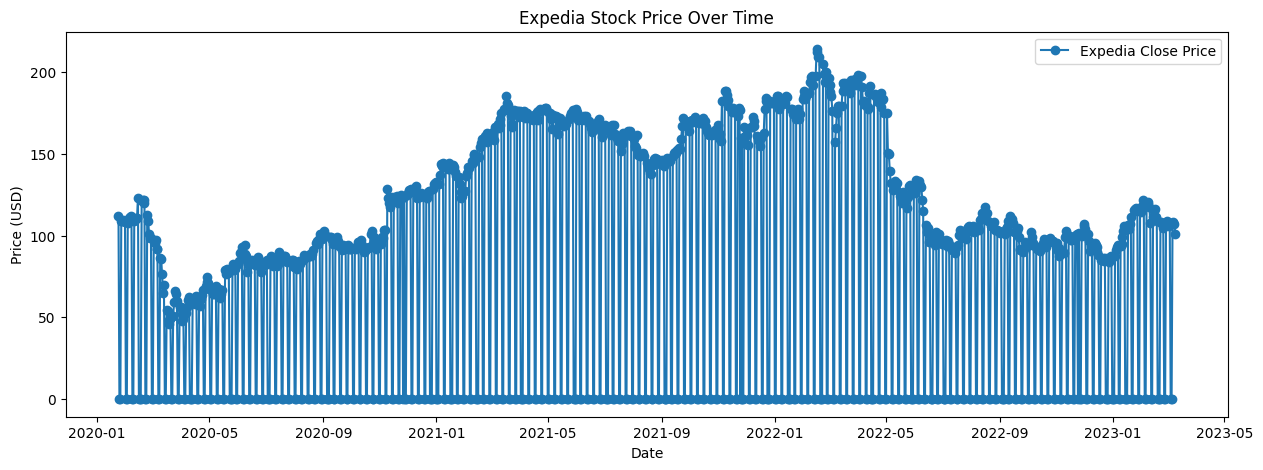

In [53]:
# Plot 1: Expedia Stock Price Over Time

# Convert 'Date' to datetime format
global_data['Date'] = pd.to_datetime(global_data['Date'])

plt.figure(figsize=(15, 5))
plt.plot(global_data['Date'], global_data['EXPE_Close'], label='Expedia Close Price', marker='o')
plt.title('Expedia Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


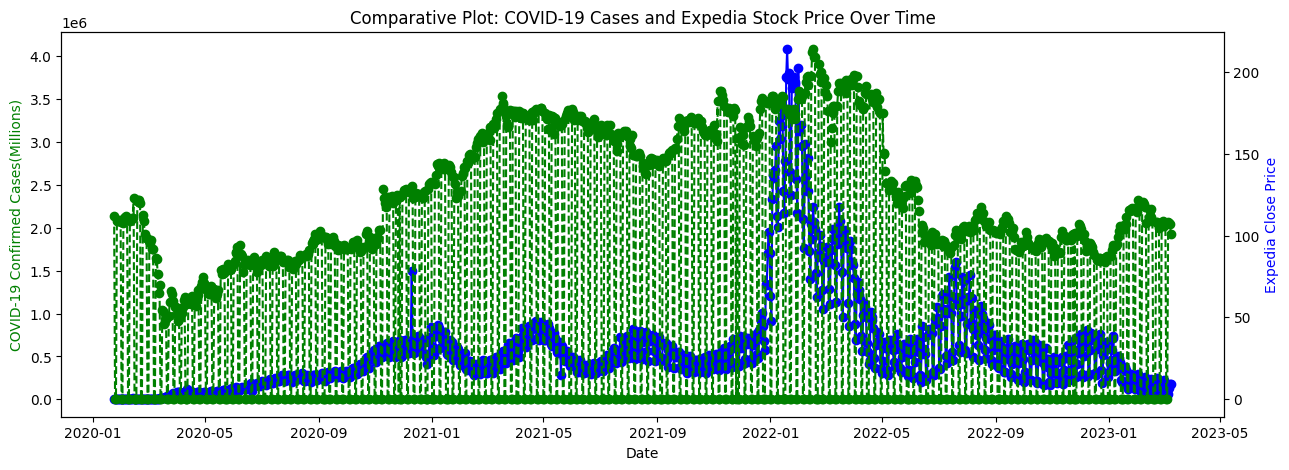

In [54]:
#Plot 2 :Comparative Plot: COVID-19 Cases, Deaths, and Expedia Stock Price Over Time
# Create a Comparative Plot
plt.figure(figsize=(15, 5))
# Plot COVID-19 Cases
plt.plot(global_data['Date'], global_data['Global_Confirmed_Cases'], label='Confirmed Cases', marker='o', color='blue')
# Plot COVID-19 Deaths on a secondary y-axis
ax1 = plt.gca()
#ax2 = ax1.twinx()
# ax2.plot(global_data['Date'], global_data['Global_Deaths'], label='Deaths', marker='o', color='red')

# Plot Expedia Stock Price on a secondary y-axis
ax3 = ax1.twinx()
ax3.plot(global_data['Date'], global_data['EXPE_Close'], label='Expedia Close Price', marker='o', linestyle='dashed', color='green')

# Customize the plot
ax1.set_xlabel('Date')
ax1.set_ylabel('COVID-19 Confirmed Cases(Millions)', color='green')
# ax2.set_ylabel('COVID-19 Deaths', color='red')
ax3.set_ylabel('Expedia Close Price', color='blue')

plt.title('Comparative Plot: COVID-19 Cases and Expedia Stock Price Over Time')
plt.show()

Plot 1: Expedia Stock Price Over Time

Plot 2: Comparative Plot - COVID-19 Cases and Expedia Stock The green line with circular markers represents the trend of global confirmed COVID-19 cases.The blue dashed line with circular markers represents the trend of Expedia stock closing prices. It is plotted on a secondary y-axis to the right.Represents the timeline in dates.

# General Interpertation

During the initial phase of the COVID-19 pandemic, the rate of case increase, which initially ranged from 500 to 2800, had a limited impact on the stock price. However, a noticeable trend emerges from May 2020 onwards, where both the stock price and the number of COVID-19 cases exhibited an upward trajectory. This ascent culminated in the stock price reaching its peak by Feb 2022.

Unexpectedly, despite a substantial decline in the stock price thereafter, the number of COVID-19 cases remained relatively steady with no significant fluctuations until May 2022 and there after we can see a decline in the covid cases

**4. The Real Estate sector>>Equity Residential**

Equity Residential is a publicly traded real estate investment trust that invests in apartments. As of December 31, 2022, the company owned or had investments in 308 properties

In [55]:
# Alpha Vantage API key (replace 'your_api_key' with your actual API key)
# api_key = '44R0OA310NHJ03W8'
# api_key = '4GCMU5950MOXB55I'
# api_key = 'QPNJZSFZ1S2LPWEJ'
# api_key = '45TFGXRKLDVI8I1T'

api_key = 'QPNJZSFZ1S2LPWEJ'
# Create an instance of the TimeSeries class

#american market
ts = TimeSeries(key=api_key, output_format='pandas')
data=ts.get_daily(symbol='EQR', outputsize='full')
for date in global_data['Date']:

  d=data[0][(data[0].index == date)]
  if(d.empty):
      high_price=0
      low_price =0
      close_price=0
  else:
        high_price=d['2. high'][0]
        low_price=d['3. low'][0]
        close_price=d['4. close'][0]

  global_data.loc[global_data['Date'] == date, 'EQR_High'] = high_price
  global_data.loc[global_data['Date'] == date, 'EQR_Low'] = low_price
  global_data.loc[global_data['Date'] == date, 'EQR_Close'] = close_price


global_data[[ 'EQR_High', 'EQR_Low','EQR_Close']]

,EQR_High,EQR_Low,EQR_Close
0,83.28,82.27,82.76
1,0.00,0.00,0.00
2,0.00,0.00,0.00
3,83.01,82.12,82.34
4,83.07,82.23,82.72
...,...,...,...
1136,0.00,0.00,0.00
1137,63.38,62.48,62.70
1138,62.80,60.98,61.16
1139,62.45,60.93,61.94


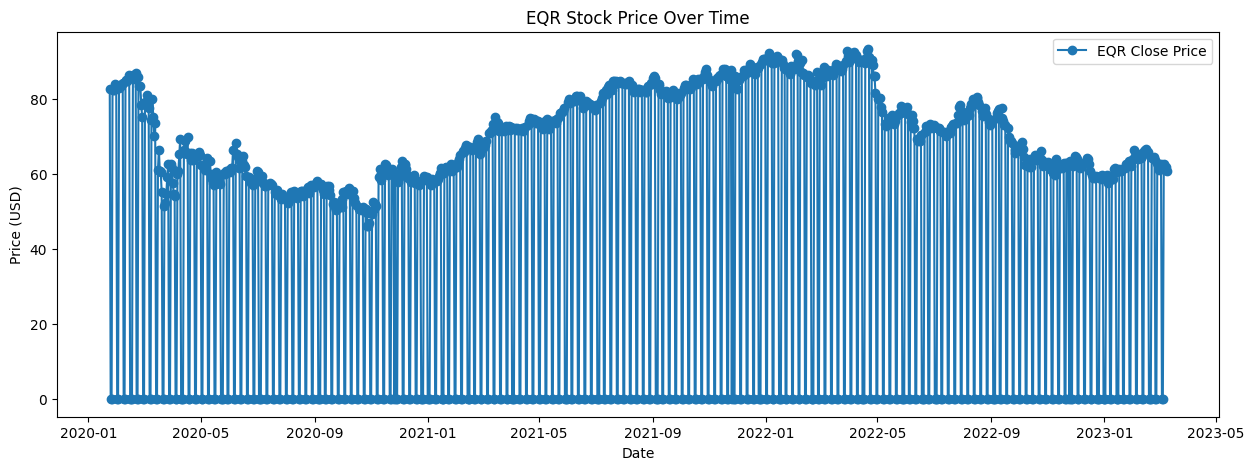

In [56]:
# Plot 1: EQR Stock Price Over Time

# Convert 'Date' to datetime format
global_data['Date'] = pd.to_datetime(global_data['Date'])

plt.figure(figsize=(15, 5))
plt.plot(global_data['Date'], global_data['EQR_Close'], label='EQR Close Price', marker='o')
plt.title('EQR Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

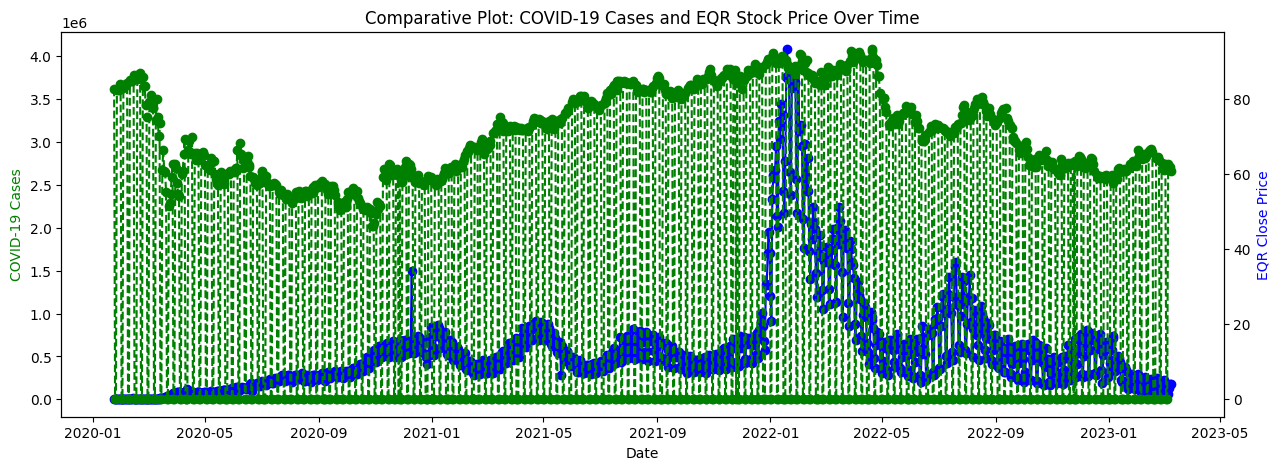

In [57]:
#Plot 2:Comparative Plot: COVID-19 Cases, Deaths, and EQR Stock Price Over Time
# Create a Comparative Plot
plt.figure(figsize=(15, 5))
# Plot COVID-19 Cases
plt.plot(global_data['Date'], global_data['Global_Confirmed_Cases'], label='Confirmed Cases', marker='o', color='blue')
# Plot COVID-19 Deaths on a secondary y-axis
ax1 = plt.gca()
#ax2 = ax1.twinx()
# ax2.plot(global_data['Date'], global_data['Global_Deaths'], label='Deaths', marker='o', color='red')

# Plot EQR Stock Price on a secondary y-axis
ax3 = ax1.twinx()
ax3.plot(global_data['Date'], global_data['EQR_Close'], label='EQR Close Price', marker='o', linestyle='dashed', color='green')

# Customize the plot
ax1.set_xlabel('Date')
ax1.set_ylabel('COVID-19 Cases', color='green')
# ax2.set_ylabel('COVID-19 Deaths', color='red')
ax3.set_ylabel('EQR Close Price', color='blue')

plt.title('Comparative Plot: COVID-19 Cases and EQR Stock Price Over Time')
plt.show()

Plot 1: EQR Stock Price Over Time

Plot 2: Comparative Plot - COVID-19 Cases and EQR Stock The green line with circular markers represents the trend of global confirmed COVID-19 cases.The blue dashed line with circular markers represents the trend of EQR stock closing prices. It is plotted on a secondary y-axis to the right.Represents the timeline in dates.

# General Interpertation

During the initial phase of the COVID-19 pandemic, the rate of case increase, which initially ranged from 500 to 2800, had a limited impact on the stock price. However, a noticeable trend emerges from May 2020 onwards, where both the stock price and the number of COVID-19 cases exhibited an upward trajectory. This ascent culminated in the stock price reaching its peak by Feb 2022.

Unexpectedly, despite a substantial decline in the stock price thereafter, the number of COVID-19 cases remained relatively steady with no significant fluctuations.

**5.Precious metal >>Barrick Gold Corporation**

Barrick Gold Corporation is a mining company that produces gold and copper with 16 operating sites in 13 countries. It is headquartered in Toronto, Ontario Canada.

In [58]:
# Alpha Vantage API key (replace 'your_api_key' with your actual API key)
# api_key = '44R0OA310NHJ03W8'
# api_key = '4GCMU5950MOXB55I'
# api_key = 'QPNJZSFZ1S2LPWEJ'
# api_key = '45TFGXRKLDVI8I1T'

api_key = 'QPNJZSFZ1S2LPWEJ'
# Create an instance of the TimeSeries class

#american market
ts = TimeSeries(key=api_key, output_format='pandas')
data=ts.get_daily(symbol='GOLD', outputsize='full')

for date in global_data['Date']:

  d=data[0][(data[0].index == date)]
  if(d.empty):
      high_price=0
      low_price =0
      close_price=0
  else:
        high_price=d['2. high'][0]
        low_price=d['3. low'][0]
        close_price=d['4. close'][0]

  global_data.loc[global_data['Date'] == date, 'GOLD_High'] = high_price
  global_data.loc[global_data['Date'] == date, 'GOLD_Low'] = low_price
  global_data.loc[global_data['Date'] == date, 'GOLD_Close'] = close_price


global_data[[ 'GOLD_High', 'GOLD_Low','GOLD_Close']]


,GOLD_High,GOLD_Low,GOLD_Close
0,18.750,18.3500,18.71
1,0.000,0.0000,0.00
2,0.000,0.0000,0.00
3,19.170,18.4500,18.62
4,18.500,17.8500,18.00
...,...,...,...
1136,0.000,0.0000,0.00
1137,16.480,16.1800,16.30
1138,16.150,15.6700,15.77
1139,15.955,15.5800,15.62


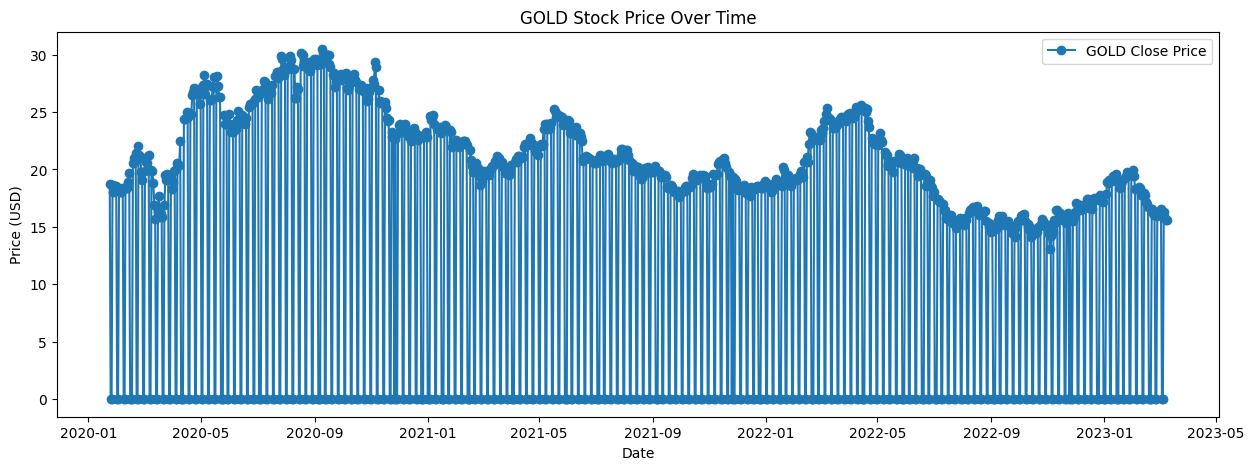

In [59]:
# Plot 1: GOLD Stock Price Over Time

# Convert 'Date' to datetime format
global_data['Date'] = pd.to_datetime(global_data['Date'])

plt.figure(figsize=(15, 5))
plt.plot(global_data['Date'], global_data['GOLD_Close'], label='GOLD Close Price', marker='o')
plt.title('GOLD Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

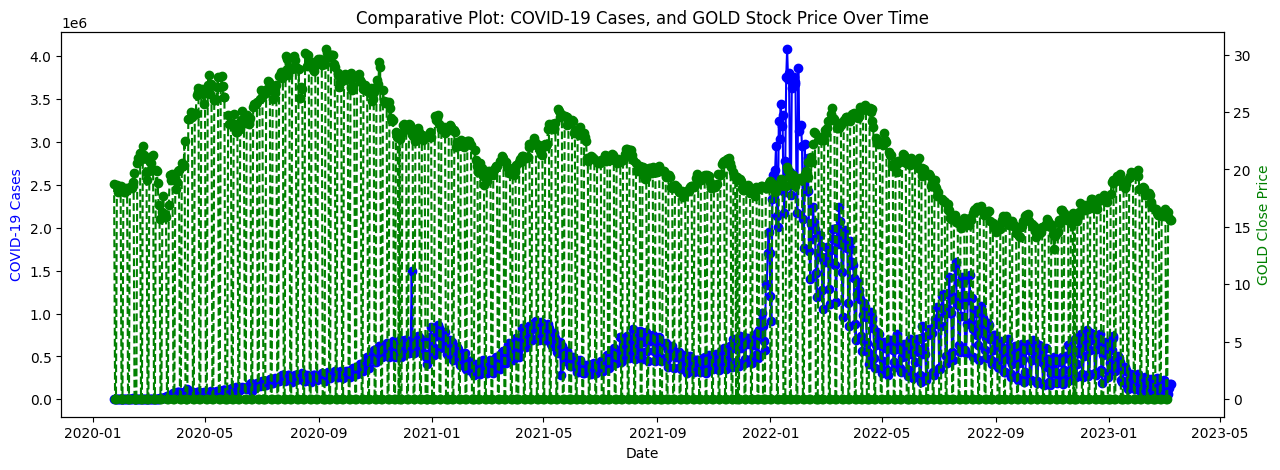

In [60]:
#Plot 2 :Comparative Plot: COVID-19 Cases, Deaths, and GOLD Stock Price Over Time
# Create a Comparative Plot
plt.figure(figsize=(15, 5))
# Plot COVID-19 Cases
plt.plot(global_data['Date'], global_data['Global_Confirmed_Cases'], label='Confirmed Cases', marker='o', color='blue')
# Plot COVID-19 Deaths on a secondary y-axis
ax1 = plt.gca()
#ax2 = ax1.twinx()
# ax2.plot(global_data['Date'], global_data['Global_Deaths'], label='Deaths', marker='o', color='red')

# Plot GOLD Stock Price on a secondary y-axis
ax3 = ax1.twinx()
ax3.plot(global_data['Date'], global_data['GOLD_Close'], label='GOLD Close Price', marker='o', linestyle='dashed', color='green')

# Customize the plot
ax1.set_xlabel('Date')
ax1.set_ylabel('COVID-19 Cases', color='blue')
# ax2.set_ylabel('COVID-19 Deaths', color='red')
ax3.set_ylabel('GOLD Close Price', color='green')

plt.title('Comparative Plot: COVID-19 Cases, and GOLD Stock Price Over Time')
plt.show()

Plot 1: Barrick Gold Stock Price Over Time

Plot 2: Comparative Plot - COVID-19 Cases and  Barrick Gold Stock The green line with circular markers represents the trend of global confirmed COVID-19 cases.The blue dashed line with circular markers represents the trend of  Barrick Gold stock closing prices. It is plotted on a secondary y-axis to the right.Represents the timeline in dates.

# General Interpertation
During the initial phase of the COVID-19 pandemic, the rate of case increase, which initially ranged from 500 to 2800, had a limited impact on the stock price. However, a noticeable trend emerges from May 2020 onwards, where both the stock price and the number of COVID-19 cases exhibited an upward trajectory. This ascent culminated in the stock price reaching its peak by Feb 2022.

Unexpectedly, the Barrick gold stock experience a huge dip in the stock price.. Simultaneously, there was a discernible increase in the number of COVID-19 cases, exhibiting a pattern of fluctuation during that time."

**Step 6**)	Append that info to the data frame created in step 3)

In [61]:
global_data

,Date,Global_Confirmed_Cases,Global_Deaths,TSLA_High,TSLA_Low,TSLA_Close,TD_High,TD_Low,TD_Close,EXPE_High,EXPE_Low,EXPE_Close,EQR_High,EQR_Low,EQR_Close,GOLD_High,GOLD_Low,GOLD_Close
0,2020-01-24,944,26,573.86,554.2600,564.82,56.740,56.240,56.46,114.280,111.731,112.14,83.28,82.27,82.76,18.750,18.3500,18.71
1,2020-01-25,493,16,0.00,0.0000,0.00,0.000,0.000,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.000,0.0000,0.00
2,2020-01-26,683,14,0.00,0.0000,0.00,0.000,0.000,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.000,0.0000,0.00
3,2020-01-27,809,26,564.44,539.2800,558.02,56.180,55.510,56.08,109.885,106.890,109.08,83.01,82.12,82.34,19.170,18.4500,18.62
4,2020-01-28,2651,49,576.81,558.0800,566.90,56.400,55.990,56.39,110.400,109.000,109.11,83.07,82.23,82.72,18.500,17.8500,18.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,2023-03-05,56126,148,0.00,0.0000,0.00,0.000,0.000,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.000,0.0000,0.00
1137,2023-03-06,58040,366,198.60,192.3000,193.81,65.905,65.140,65.20,110.090,107.560,108.55,63.38,62.48,62.70,16.480,16.1800,16.30
1138,2023-03-07,130437,923,194.20,186.1000,187.71,64.970,63.070,63.46,110.640,107.150,107.51,62.80,60.98,61.16,16.150,15.6700,15.77
1139,2023-03-08,179446,1445,186.50,180.0000,182.00,63.590,62.835,63.17,108.630,106.030,107.23,62.45,60.93,61.94,15.955,15.5800,15.62


In [62]:
global_data.to_csv("Coviddata_With_Stock_Prices.csv")

# **Conclusion**

In the preceding analyses, we meticulously examined the correlation between the number of confirmed COVID-19 cases and stock prices across various industries. From these insights, a discernible pattern emerges:

* The American market exhibits susceptibility to the COVID-19 pandemic only during its early stages.

* In contrast to American Market, the Canadian market remains remarkably resilient, showing little to no influence from the ebb and flow of the pandemic.

* The Travel sector demonstrates consistent stability, exhibiting minimal fluctuations even during the peaks of COVID-19 cases.

* The Real Estate sector experienced a slight decline in stock prices during the initial outbreak of COVID-19, but it swiftly rebounded and maintained a steadfast trajectory throughout subsequent years.

* The Precious Metal sector initially appeared unaffected by the surge in COVID-19 cases. However, a significant deviation occurred in January 2022, leading to a decline in stock prices that did not recover to the previously established highs during the period under analysis.

These observations collectively suggest nuanced and industry-specific responses to the dynamic challenges posed by the COVID-19 pandemic.